# General Implementation

### for 3-city example problem


Airline Routing Problem Summary
Number of Routes: 4
Number of Flights: 4
Number of Tails: 2

Penalty Coefficients:
  A (Flight Coverage Constraint): 1.0
  B (Tail Assignment Constraint): 1.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 1.0
  Flight 2: Cf_2 = 1.0
  Flight 3: Cf_3 = 1.0
  Flight 4: Cf_4 = 1.0

Route Costs:
  Route 1: c_1 = 0.0
  Route 2: c_2 = 0.0
  Route 3: c_3 = 0.0
  Route 4: c_4 = 0.0

Flight-Route Incidence Matrix (afr):
[[1 0 1 0]
 [0 1 0 1]
 [1 0 0 1]
 [0 1 1 0]]

Tail-Route Incidence Matrix (btr):
[[1 0 1 0]
 [0 1 0 1]]

QUBO Linear Coefficients (h):
[-5. -5. -5. -5.]

QUBO Coupling Matrix (J):
[[0. 0. 4. 2.]
 [0. 0. 2. 4.]
 [4. 2. 0. 0.]
 [2. 4. 0. 0.]]

Starting QAOA optimization with 3 layer(s)...
Optimizing 6 parameters: (γ_0, β_0) (γ_1, β_1) (γ_2, β_2) 

Optimization complete!
Optimal parameters:
  Layer 0: γ_0 = 1.9979, β_0 = 0.9436
  Layer 1: γ_1 = 2.0145, β_1 = 1.9990
  Layer 2: γ_2 = 0.9977, β_2 = 1.0052
Final expectation: -8.9062
{'1100':

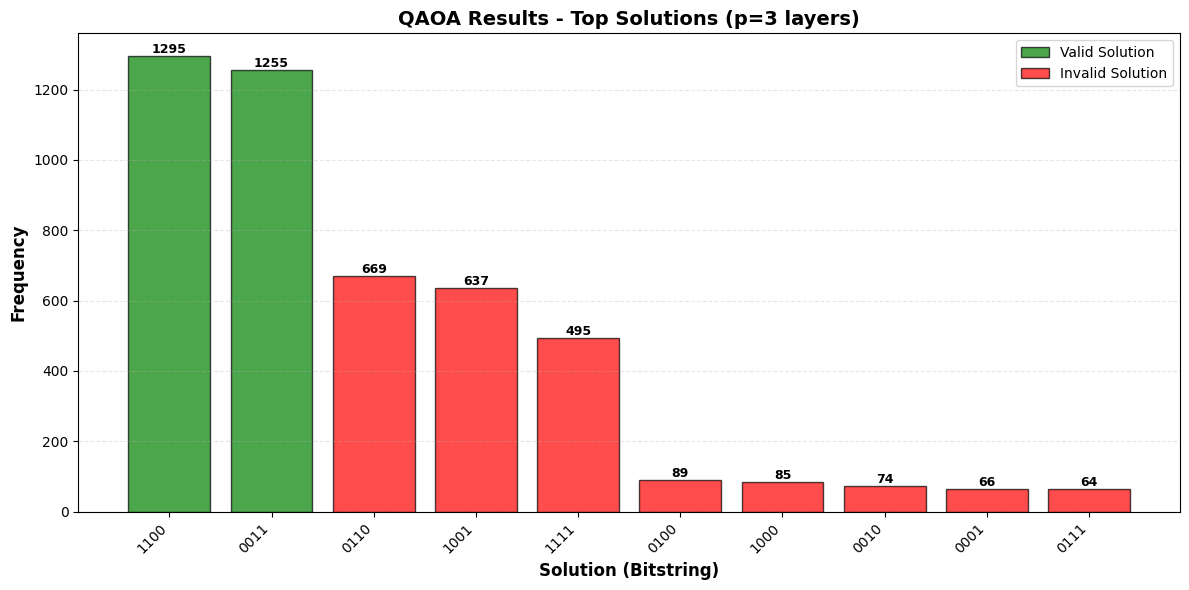


QAOA Histogram Summary
Total unique solutions found: 16
Displaying top 10 solutions
QAOA layers (p): 3
Valid solutions in top 10: 2/10

Best valid solution:
  Bitstring: 1100
  Frequency: 1295
  Energy: -10.0000
  Selected routes: [2, 3]


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=3 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [4]:
from airlines_qaoa import Airlines
import numpy as np
from qiskit.visualization import plot_histogram

afr = np.array([
        [1, 0, 1, 0],  # F1 in R1, R3
        [0, 1, 0, 1],  # F2 in R2, R4
        [1, 0, 0, 1],  # F3 in R1, R4
        [0, 1, 1, 0]   # F4 in R2, R3
    ])

btr = np.array([
        [1, 0, 1, 0],  # Tail A assigned to R1, R3
        [0, 1, 0, 1]   # Tail B assigned to R2, R4
    ])

qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(4),
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=np.ones(4),
    )

qaoa.problem_summary()

qaoa.build_qaoa(p_layers=3)

results = qaoa.optimize(p_layers=3, initial_params=[1.0, 1.0,1,1,1,1], shots=1024)
print(results['counts'])

solutions = qaoa.analyze_results(results['counts'], top_k=5)

qaoa.plot_qaoa_histogram(results, top_k=10)

# Simulated annealing


Simulated Annealing Result:
Best Bitstring: 1100
Best Energy: -10.0000
Valid Solution: ✓


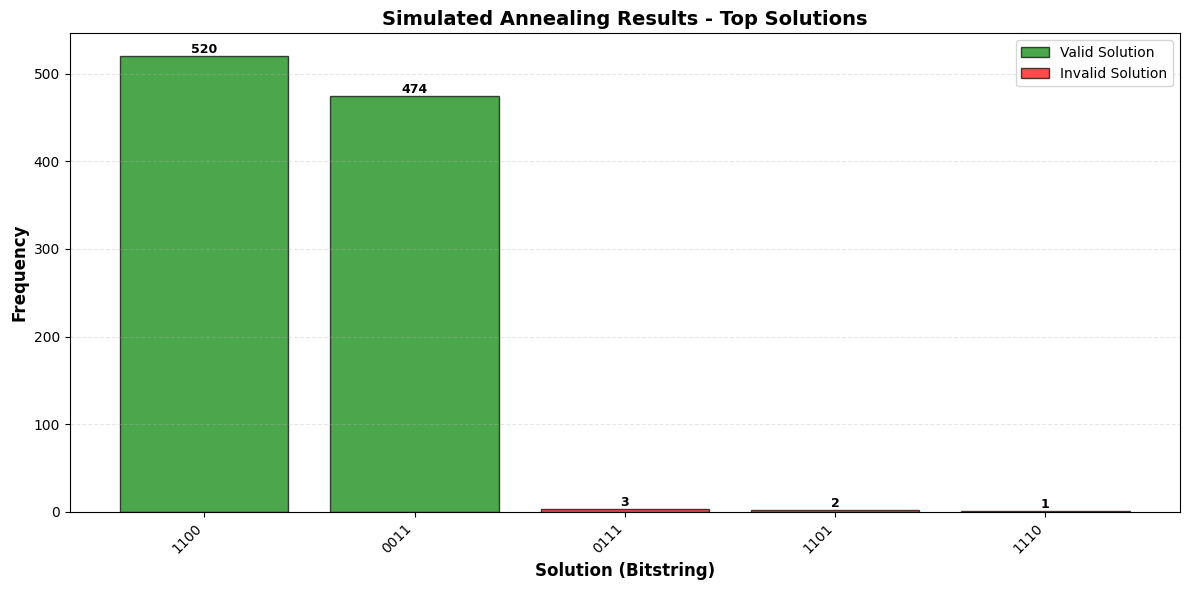


Simulated Annealing Histogram Summary
Total unique solutions found: 5
Displaying top 5 solutions
Valid solutions in top 10: 2/5


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [ ]:
setup = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(4),
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=np.ones(4),  # Higher penalties for unassigned flights
    )

sa = setup.simulated_annealing(num_reads=1000)
setup.plot_sa_histogram(sa, top_k=10)

### 5 city example problem


Airline Routing Problem Summary
Number of Routes: 5
Number of Flights: 6
Number of Tails: 3

Penalty Coefficients:
  A (Flight Coverage Constraint): 1
  B (Tail Assignment Constraint): 1

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 1.0
  Flight 2: Cf_2 = 1.0
  Flight 3: Cf_3 = 1.0
  Flight 4: Cf_4 = 1.0
  Flight 5: Cf_5 = 1.0
  Flight 6: Cf_6 = 1.0

Route Costs:
  Route 1: c_1 = 0.0
  Route 2: c_2 = 0.0
  Route 3: c_3 = 0.0
  Route 4: c_4 = 0.0
  Route 5: c_5 = 0.0

Flight-Route Incidence Matrix (afr):
[[1 0 1 0 0]
 [0 1 0 1 0]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [0 0 1 1 0]
 [0 0 0 1 1]]

Tail-Route Incidence Matrix (btr):
[[1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 0 0 1]]

QUBO Linear Coefficients (h):
[-5. -5. -5. -7. -7.]

QUBO Coupling Matrix (J):
[[0. 0. 4. 0. 2.]
 [0. 0. 0. 4. 2.]
 [4. 0. 0. 2. 0.]
 [0. 4. 2. 0. 2.]
 [2. 2. 0. 2. 0.]]

Starting QAOA optimization with 3 layer(s)...
Optimizing 6 parameters: (γ_0, β_0) (γ_1, β_1) (γ_2, β_2) 

Optimization complete!
Optimal parameters:
 

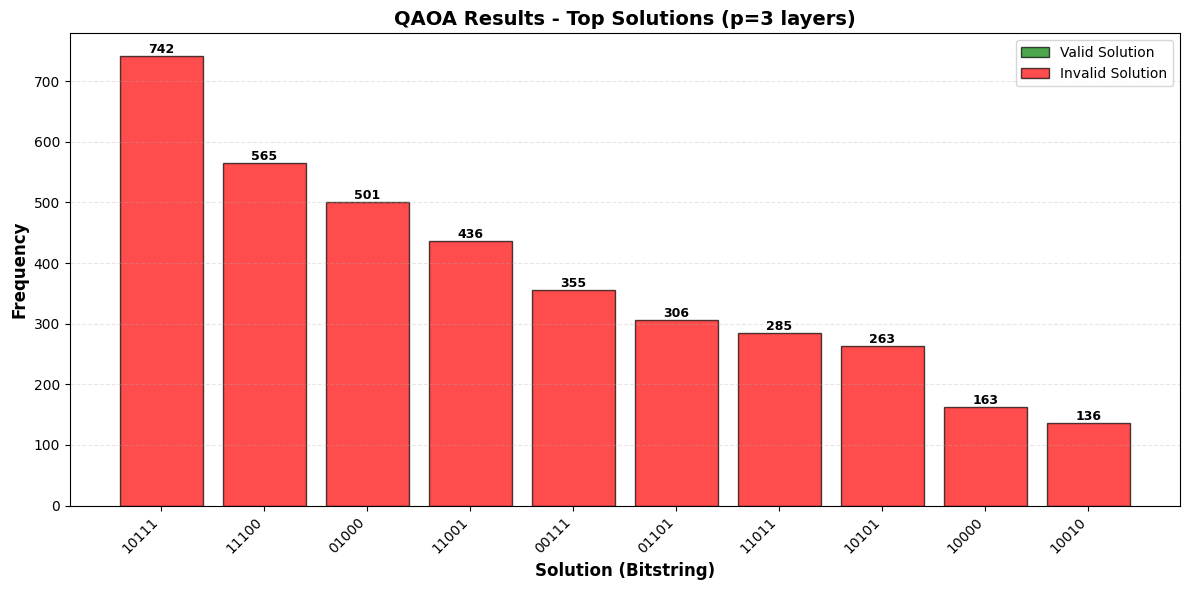


QAOA Histogram Summary
Total unique solutions found: 32
Displaying top 10 solutions
QAOA layers (p): 3
Valid solutions in top 10: 0/10


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=3 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [5]:

    
# Example: 6 flights, 5 routes, 3 tails
# This is a made-up example to show generalization
    
afr = np.array([
        [1, 0, 1, 0, 0],  # F1
        [0, 1, 0, 1, 0],  # F2
        [1, 0, 0, 0, 1],  # F3
        [0, 1, 0, 0, 1],  # F4
        [0, 0, 1, 1, 0],  # F5
        [0, 0, 0, 1, 1],  # F6
    ])
    
btr = np.array([
        [1, 0, 1, 0, 0],  # Tail 1
        [0, 1, 0, 1, 0],  # Tail 2
        [0, 0, 0, 0, 1],  # Tail 3
    ])
    
# Create QAOA instance
qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(5),  # Different costs for each route
        penalty_A=1,
        penalty_B=1,
        flight_penalties=np.ones(6)
    )
    
# Print problem summary
qaoa.problem_summary()
    
# Build circuit
qaoa.build_qaoa(p_layers=3)
    
# Optimize
results = qaoa.optimize(p_layers=3, initial_params=[1, 1, 1, 1, 1, 1], shots=1024)
    
# Analyze results
solutions = qaoa.analyze_results(results['counts'], top_k=10)
    
# Visualize top_k solutions
qaoa.plot_qaoa_histogram(results, top_k=10)   

## Simulated Annealing



Simulated Annealing Result:
Best Bitstring: 10011
Best Energy: -15.0000
Valid Solution: ✗


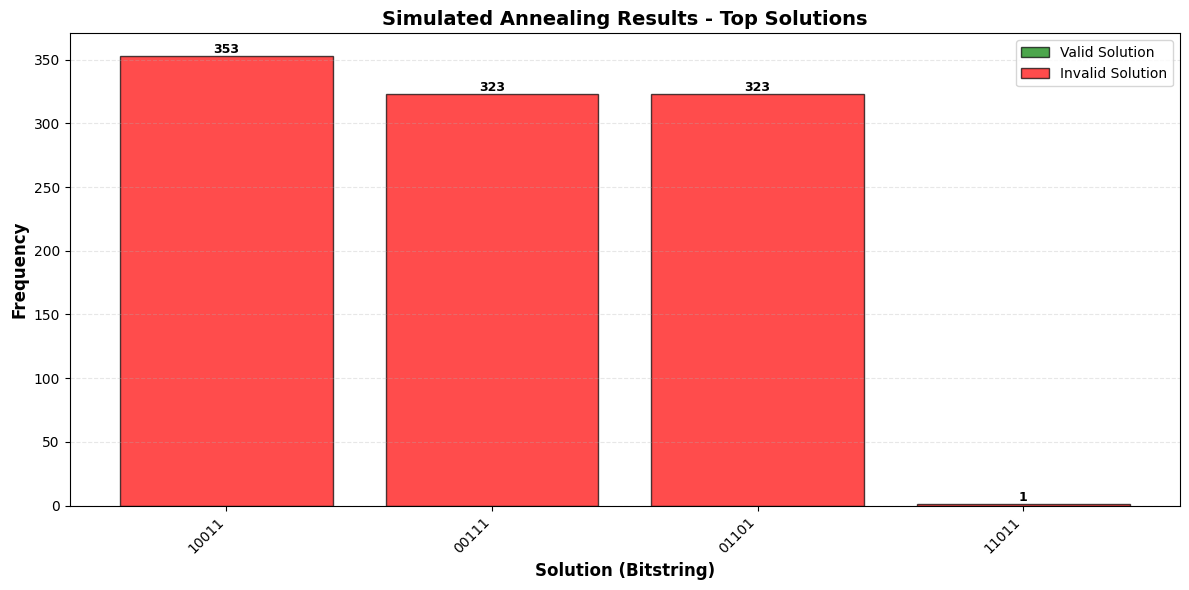


Simulated Annealing Histogram Summary
Total unique solutions found: 4
Displaying top 4 solutions
Valid solutions in top 10: 0/4


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Simulated Annealing Results - Top Solutions'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [ ]:
setup = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=np.zeros(5),  # Different costs for each route
        penalty_A=1,
        penalty_B=1,
        flight_penalties=np.ones(6)
    )

sa = setup.simulated_annealing(num_reads=1000)
setup.plot_sa_histogram(sa, top_k=10)

## 8 city example problem


Airline Routing Problem Summary
Number of Routes: 12
Number of Flights: 16
Number of Tails: 5

Penalty Coefficients:
  A (Flight Coverage Constraint): 1.0
  B (Tail Assignment Constraint): 1.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 10.0
  Flight 2: Cf_2 = 10.0
  Flight 3: Cf_3 = 10.0
  Flight 4: Cf_4 = 10.0
  Flight 5: Cf_5 = 10.0
  Flight 6: Cf_6 = 10.0
  Flight 7: Cf_7 = 10.0
  Flight 8: Cf_8 = 10.0
  Flight 9: Cf_9 = 10.0
  Flight 10: Cf_10 = 10.0
  Flight 11: Cf_11 = 10.0
  Flight 12: Cf_12 = 10.0
  Flight 13: Cf_13 = 10.0
  Flight 14: Cf_14 = 10.0
  Flight 15: Cf_15 = 10.0
  Flight 16: Cf_16 = 10.0

Route Costs:
  Route 1: c_1 = 0
  Route 2: c_2 = 0
  Route 3: c_3 = 0
  Route 4: c_4 = 0
  Route 5: c_5 = 0
  Route 6: c_6 = 0
  Route 7: c_7 = 0
  Route 8: c_8 = 0
  Route 9: c_9 = 0
  Route 10: c_10 = 0
  Route 11: c_11 = 0
  Route 12: c_12 = 0

Flight-Route Incidence Matrix (afr):
[[1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 

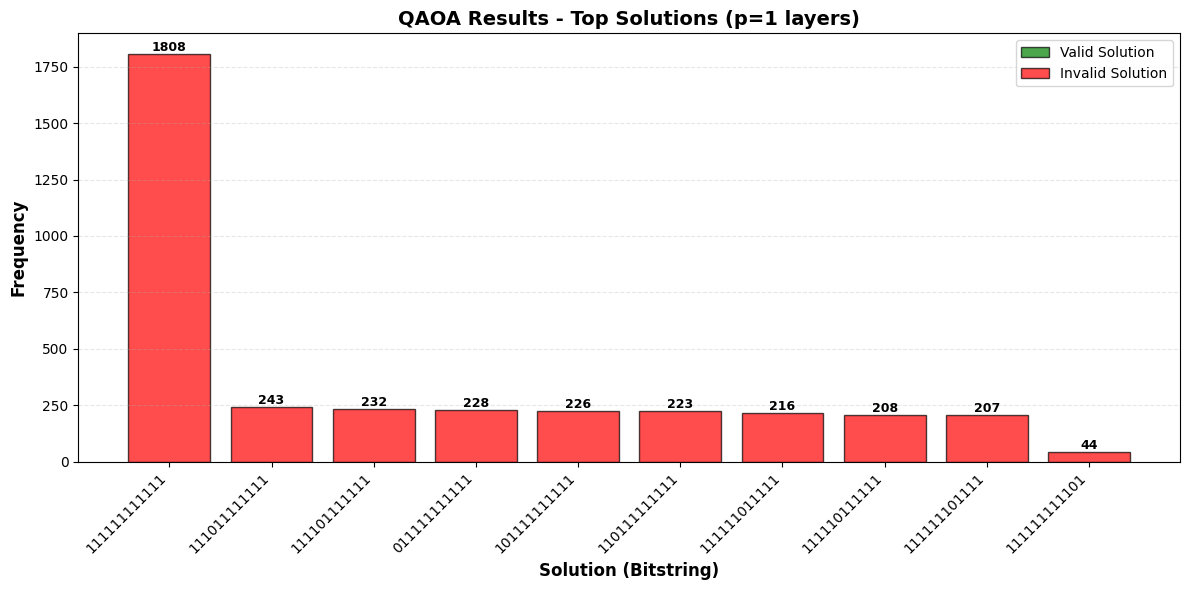


QAOA Histogram Summary
Total unique solutions found: 251
Displaying top 10 solutions
QAOA layers (p): 1
Valid solutions in top 10: 0/10


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=1 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [6]:
from airlines_qaoa import Airlines
import numpy as np
from qiskit.visualization import plot_histogram

"""
        8-City Airline Routing Problem
        
        Cities: A, B, C, D, E, F, G, H
        
        Flights (16 total):
        F1: A→B,  F2: B→A,  F3: A→C,  F4: C→A
        F5: B→D,  F6: D→B,  F7: C→E,  F8: E→C
        F9: D→F, F10: F→D, F11: E→G, F12: G→E
        F13: F→H, F14: H→F, F15: G→H, F16: H→G
        
        Routes (12 total):
        R1: F1→F5→F9→F13 (A→B→D→F→H)
        R2: F2→F6→F10→F14 (B→A, D→B, F→D, H→F)
        R3: F3→F7→F11→F15 (A→C→E→G→H)
        R4: F4→F8→F12→F16 (C→A, E→C, G→E, H→G)
        R5: F1→F6 (A→B→D→B) - short route
        R6: F2→F5 (B→A, B→D) - short route
        R7: F3→F8 (A→C, E→C) - short route
        R8: F4→F7 (C→A, C→E) - short route
        R9: F9→F14 (D→F, H→F) - short route
        R10: F10→F13 (F→D, F→H) - short route
        R11: F11→F16 (E→G, H→G) - short route
        R12: F12→F15 (G→E, G→H) - short route
        
        Tails: 5 aircraft
        """

afr = np.array([
            # R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12
            [1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],  # F1
            [0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],  # F2
            [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],  # F3
            [0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],  # F4
            [1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],  # F5
            [0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],  # F6
            [0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],  # F7
            [0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0],  # F8
            [1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],  # F9
            [0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],  # F10
            [0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0],  # F11
            [0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],  # F12
            [1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],  # F13
            [0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],  # F14
            [0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],  # F15
            [0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0],  # F16
        ])

btr = np.array([
            # R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12
            [1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],  # Tail 1
            [0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],  # Tail 2
            [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],  # Tail 3
            [0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0],  # Tail 4
            [0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1],  # Tail 5
        ])

# Route costs (can be adjusted based on distance, fuel, etc.)
route_costs = np.array([100, 100, 120, 120, 50, 50, 40, 40, 60, 60, 55, 55])*0
        
# Flight penalties for uncovered flights
flight_penalties = np.ones(16) * 10.0

# Create QAOA instance
qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=route_costs,
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=flight_penalties
    )

# Print problem summary
qaoa.problem_summary()
# Build QAOA circuit
qaoa.build_qaoa(p_layers=1)

# Optimize
results = qaoa.optimize(p_layers=1, initial_params=[1.0, 1.0], shots=1024)
print(results['counts'])

# Analyze results
solutions = qaoa.analyze_results(results['counts'], top_k=5)
# Visualize top_k solutions
qaoa.plot_qaoa_histogram(results, top_k=10)

        

# 10 city example problem



Airline Routing Problem Summary
Number of Routes: 15
Number of Flights: 20
Number of Tails: 6

Penalty Coefficients:
  A (Flight Coverage Constraint): 1.0
  B (Tail Assignment Constraint): 1.0

Flight Penalties (Cf for each flight):
  Flight 1: Cf_1 = 12.0
  Flight 2: Cf_2 = 12.0
  Flight 3: Cf_3 = 12.0
  Flight 4: Cf_4 = 12.0
  Flight 5: Cf_5 = 12.0
  Flight 6: Cf_6 = 12.0
  Flight 7: Cf_7 = 12.0
  Flight 8: Cf_8 = 12.0
  Flight 9: Cf_9 = 12.0
  Flight 10: Cf_10 = 12.0
  Flight 11: Cf_11 = 12.0
  Flight 12: Cf_12 = 12.0
  Flight 13: Cf_13 = 12.0
  Flight 14: Cf_14 = 12.0
  Flight 15: Cf_15 = 12.0
  Flight 16: Cf_16 = 12.0
  Flight 17: Cf_17 = 12.0
  Flight 18: Cf_18 = 12.0
  Flight 19: Cf_19 = 12.0
  Flight 20: Cf_20 = 12.0

Route Costs:
  Route 1: c_1 = 150
  Route 2: c_2 = 150
  Route 3: c_3 = 140
  Route 4: c_4 = 140
  Route 5: c_5 = 80
  Route 6: c_6 = 70
  Route 7: c_7 = 75
  Route 8: c_8 = 65
  Route 9: c_9 = 45
  Route 10: c_10 = 40
  Route 11: c_11 = 42
  Route 12: c_12 = 48


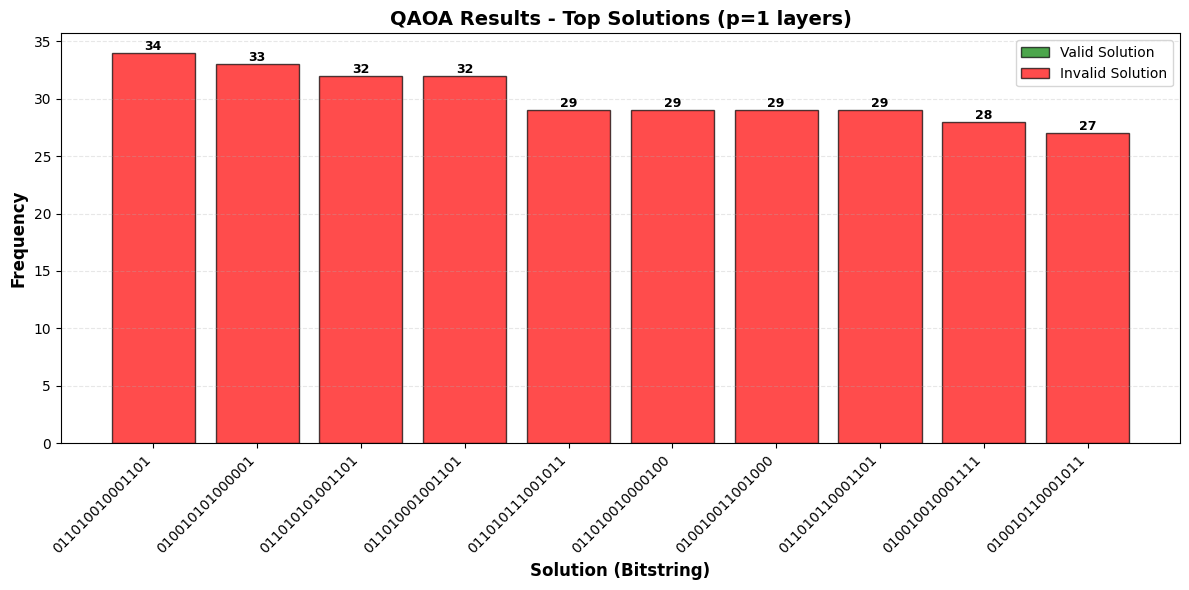


QAOA Histogram Summary
Total unique solutions found: 471
Displaying top 10 solutions
QAOA layers (p): 1
Valid solutions in top 10: 0/10


(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'QAOA Results - Top Solutions (p=1 layers)'}, xlabel='Solution (Bitstring)', ylabel='Frequency'>)

In [7]:
"""
        10-City Airline Routing Problem
        
        Cities: A, B, C, D, E, F, G, H, I, J
        
        Flights (20 total):
        F1: A→B,  F2: B→C,  F3: C→D,  F4: D→E,  F5: E→A
        F6: B→A,  F7: C→B,  F8: D→C,  F9: E→D, F10: A→E
        F11: F→G, F12: G→H, F13: H→I, F14: I→J, F15: J→F
        F16: G→F, F17: H→G, F18: I→H, F19: J→I, F20: F→J
        
        Routes (15 total):
        R1: F1→F2→F3→F4→F5 (A→B→C→D→E→A) - full cycle 1
        R2: F6→F7→F8→F9→F10 (reverse cycle 1)
        R3: F11→F12→F13→F14→F15 (F→G→H→I→J→F) - full cycle 2
        R4: F16→F17→F18→F19→F20 (reverse cycle 2)
        R5: F1→F2→F7→F6 (A→B→C→B→A) - short loop
        R6: F3→F4→F9→F8 (C→D→E→D→C) - short loop
        R7: F11→F12→F17→F16 (F→G→H→G→F) - short loop
        R8: F13→F14→F19→F18 (H→I→J→I→H) - short loop
        R9: F1→F10 (A→B, A→E) - connector
        R10: F2→F8 (B→C, D→C) - connector
        R11: F3→F9 (C→D, E→D) - connector
        R12: F11→F20 (F→G, F→J) - connector
        R13: F12→F18 (G→H, I→H) - connector
        R14: F13→F19 (H→I, J→I) - connector
        R15: F5→F15 (E→A, J→F) - inter-cycle connector
        
        Tails: 6 aircraft
        """
        
# Flight-Route incidence matrix (20 flights × 15 routes)
afr = np.array([
            # R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12 R13 R14 R15
            [1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],  # F1
            [1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],  # F2
            [1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],  # F3
            [1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # F4
            [1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],  # F5
            [0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # F6
            [0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # F7
            [0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],  # F8
            [0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],  # F9
            [0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],  # F10
            [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0],  # F11
            [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0],  # F12
            [0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0],  # F13
            [0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],  # F14
            [0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],  # F15
            [0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],  # F16
            [0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],  # F17
            [0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0],  # F18
            [0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0],  # F19
            [0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],  # F20
        ])
        
# Tail-Route incidence matrix (6 tails × 15 routes)
btr = np.array([
            # R1  R2  R3  R4  R5  R6  R7  R8  R9 R10 R11 R12 R13 R14 R15
            [1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # Tail 1
            [0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],  # Tail 2
            [0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],  # Tail 3
            [0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],  # Tail 4
            [0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0],  # Tail 5
            [0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1],  # Tail 6
        ])
        
# Route costs
route_costs = np.array([150, 150, 140, 140, 80, 70, 75, 65, 45, 40, 42, 48, 43, 44, 90])
        
# Flight penalties for uncovered flights
flight_penalties = np.ones(20) * 12.0

# Create QAOA instance
qaoa = Airlines(
        afr_matrix=afr,
        btr_matrix=btr,
        route_costs=route_costs,
        penalty_A=1.0,
        penalty_B=1.0,
        flight_penalties=flight_penalties
    )

# Print problem summary
qaoa.problem_summary()

# Build QAOA circuit
qaoa.build_qaoa(p_layers=1)
# Optimize
results = qaoa.optimize(p_layers=1, initial_params=[1.0, 1.0], shots=1024)
print(results['counts'])
# Analyze results
solutions = qaoa.analyze_results(results['counts'], top_k=5)
# Visualize top_k solutions
qaoa.plot_qaoa_histogram(results, top_k=10)

        